Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

How are you feeling right now? anxious


  0%|          | 0/50 [00:00<?, ?it/s]

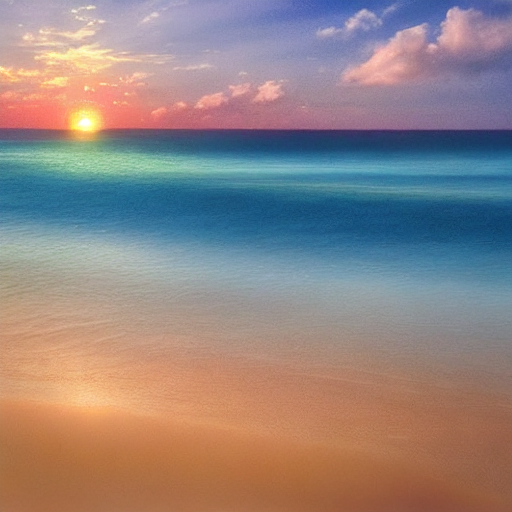

In [ ]:
import nbformat

nb_path = "your_uploaded_notebook.ipynb"  # replace with your file name
nb = nbformat.read(nb_path, as_version=5)

# Remove widgets metadata at the notebook level
if "widgets" in nb.metadata:
    del nb.metadata["widgets"]

# Remove widgets metadata from each cell
for cell in nb.cells:
    if "widgets" in cell.metadata:
        del cell.metadata["widgets"]

# Save the cleaned notebook
nbformat.write(nb, nb_path)
print(f"Cleaned widgets metadata in {nb_path}. Should open without errors now!")

!pip install diffusers transformers accelerate torch gradio --quiet

import torch
from diffusers import StableDiffusionPipeline

# Load model (no fp16 issues on GPU)
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

# Move to GPU
pipe = pipe.to("cuda")

# Emotion map
emotion_map = {
    "happy": "bright colorful landscape, sunlight, flowers, uplifting",
    "sad": "soft colors, rainy scenery, gentle mountains, comforting",
    "anxious": "calm sea, soft pastel sky, gentle waves, serene",
    "angry": "stormy sky, dark clouds, dramatic mountains, cathartic",
    "relaxed": "sunset, soft light, peaceful lake, peaceful",
    "excited": "vibrant city, dynamic lights, playful colors"
}

# Take input
user_emotion = input("How are you feeling right now? ").lower()

prompt = emotion_map.get(user_emotion, "calm nature scene, soft colors, soothing")

# Generate image
image = pipe(prompt, guidance_scale=7.5).images[0]

# Display image (this always works in Colab)
from IPython.display import display
display(image)
